<a href="https://colab.research.google.com/github/mkap007/Machine_Learning_Codsoft/blob/main/Movie_Genre_Classification_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [3]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [6]:
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep=":::", names=["ID", "TITLE", "DESCRIPTION"], engine="python")

In [7]:
test_data

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [8]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
test_data.info

<bound method DataFrame.info of           ID                             TITLE  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             DESCRIPTION  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...          

<ipython-input-10-2110c44dadc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, y = 'GENRE',  order = train_data['GENRE'].value_counts().index, palette='rocket', legend=False)
<ipython-input-10-2110c44dadc1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='rocket', legend=False)


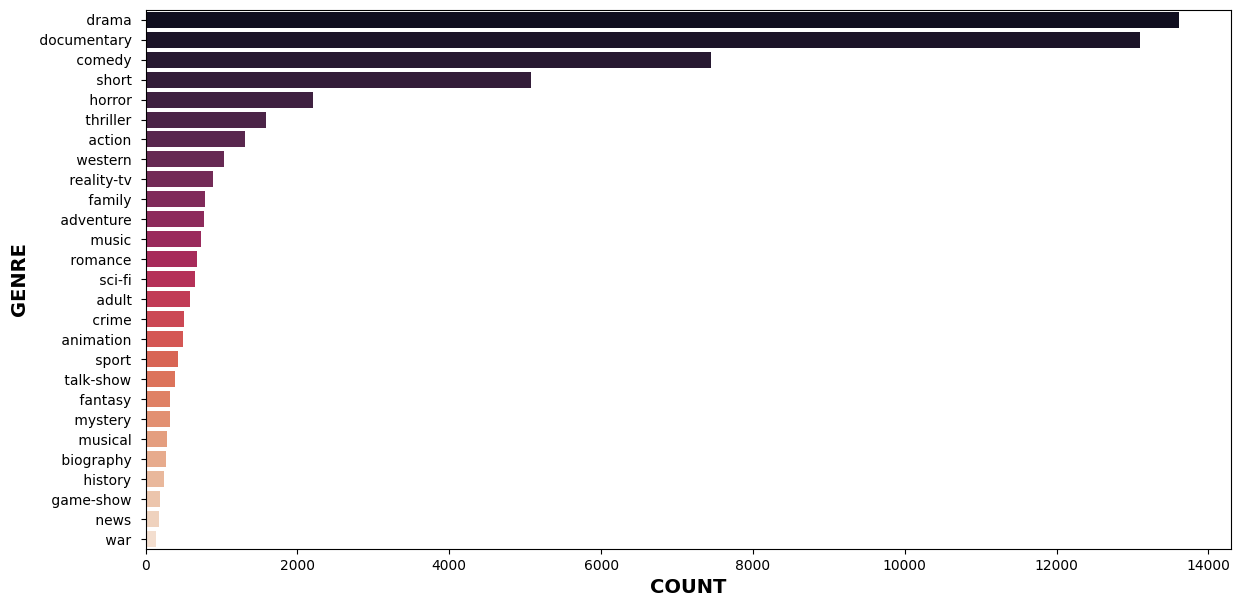

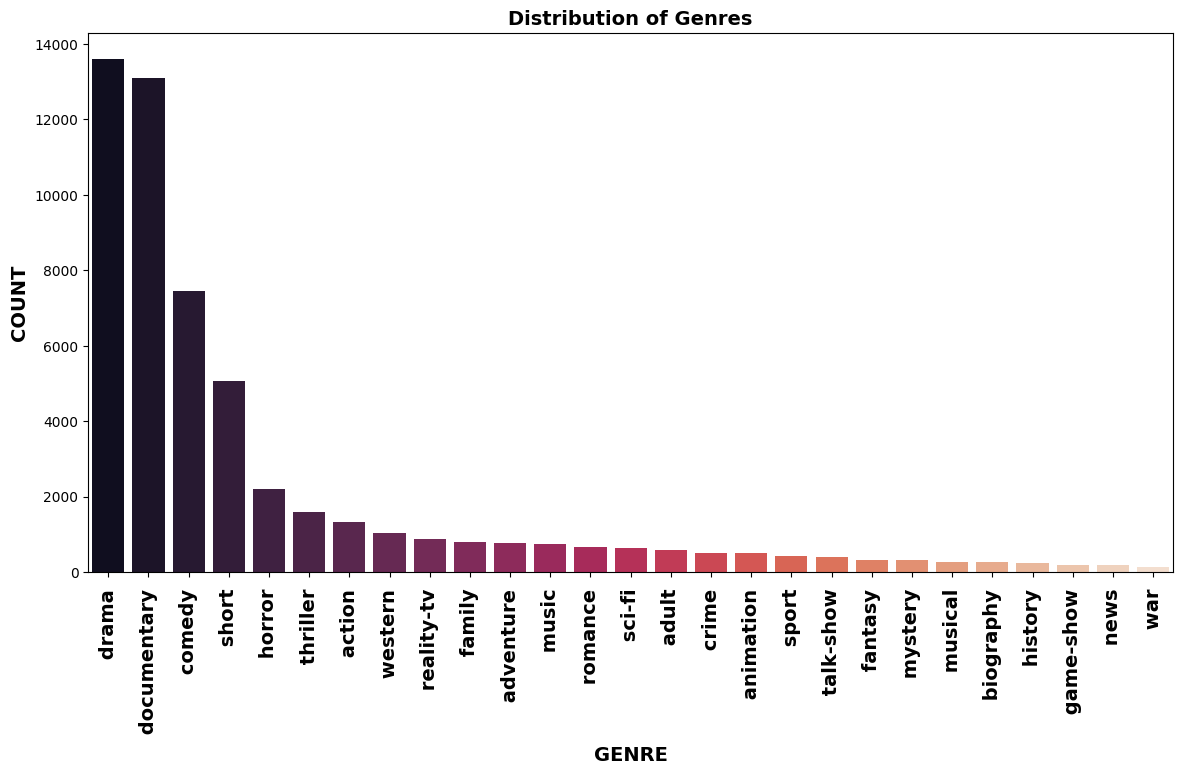

In [10]:
#Countplot
plt.figure(figsize=(14, 7))
sns.countplot(data = train_data, y = 'GENRE',  order = train_data['GENRE'].value_counts().index, palette='rocket', legend=False)
#sns.color_palette("rocket", as_cmap=True)
plt.xlabel('COUNT', fontsize = 14, fontweight = 'bold')
plt.ylabel('GENRE', fontsize = 14, fontweight = 'bold')


#Barplot
plt.figure(figsize=(14, 7))
counts = train_data['GENRE'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='rocket', legend=False)
plt.xlabel('GENRE', fontsize=14, fontweight='bold')
plt.ylabel('COUNT', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [11]:
import nltk
nltk.download('stopwords')

stemmer = LancasterStemmer()
stop_word = set(stopwords.words('english'))

#Cleaning
def clean_text(text):
  text = text.lower()
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'pic.\S+', '', text)
  text = re.sub(r"[^a-zA-Z+']", ' ', text)
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
  text = "".join([i for i in text if i not in string.punctuation])
  words = nltk.word_tokenize(text)
  stopwords = nltk.corpus.stopwords.words('english')
  text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
  text = re.sub("\s[\s]+", " ", text).strip()
  return text

train_data['Text_cleaning'] = train_data['DESCRIPTION'].apply(clean_text)
test_data['Text_cleaning'] = test_data['DESCRIPTION'].apply(clean_text)

train_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,TITLE,GENRE,DESCRIPTION,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...


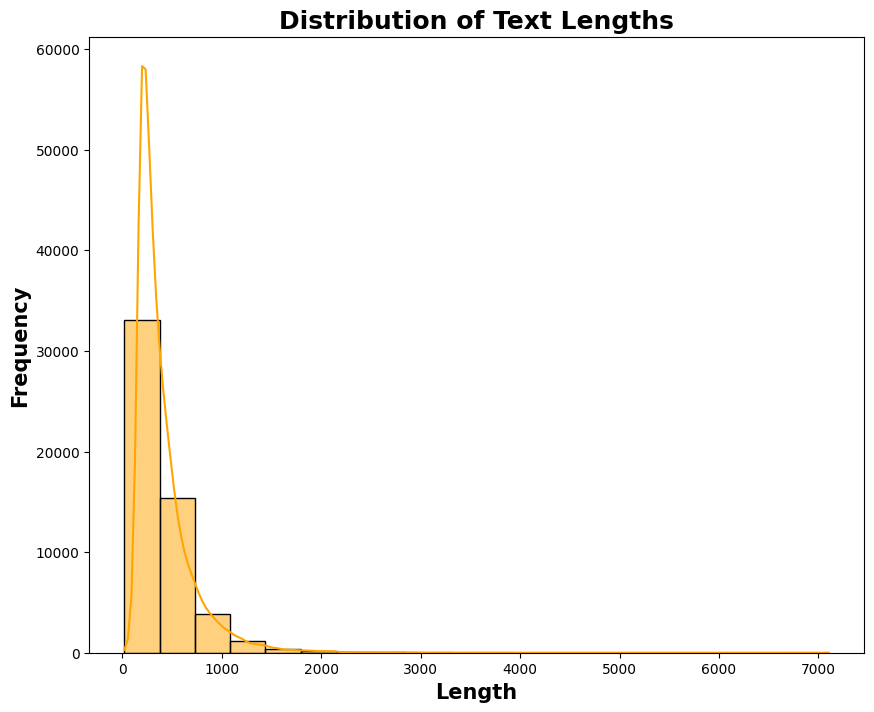

In [12]:
train_data['Length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
train_data.head()

plt.figure(figsize = (10,8))
sns.histplot(data=train_data, x='Length_Text_cleaning', bins = 20, kde=True, color='orange')
plt.xlabel('Length', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.title('Distribution of Text Lengths', fontsize=18, fontweight = 'bold')
plt.show()

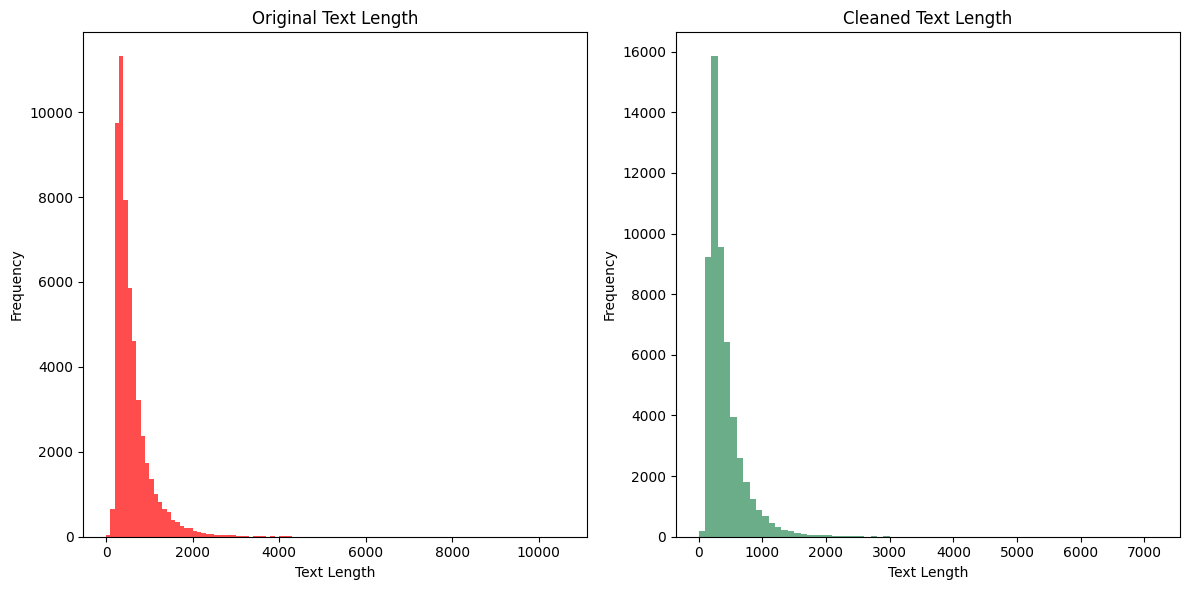

In [13]:
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_data['DESCRIPTION'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='red', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='seagreen', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_data['Text_cleaning'])
X_test = vectorizer.transform(test_data['Text_cleaning'])



In [15]:
#Spliting
X = X_train
y = train_data['GENRE']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

#Classify
classifier = MultinomialNB()
classifier.fit(X_train, y_train)





MultinomialNB()

In [16]:
#Validation
y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy: ", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy:  0.4470165083463986
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       248
       adult        0.00      0.00      0.00       110
   adventure        0.00      0.00      0.00       150
   animation        0.00      0.00      0.00       107
   biography        0.00      0.00      0.00        52
      comedy        0.72      0.04      0.08      1497
       crime        0.00      0.00      0.00        90
 documentary        0.53      0.90      0.67      2586
       drama        0.39      0.88      0.54      2773
      family        0.00      0.00      0.00       164
     fantasy        0.00      0.00      0.00        67
   game-show        0.00      0.00      0.00        33
     history        0.00      0.00      0.00        47
      horror        0.00      0.00      0.00       424
       music        0.00      0.00      0.00       163
     musical        0.00      0.00      0.00        56
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

test_data.to_csv('predicted_genres.csv', index=False)
test_data

,ID,TITLE,DESCRIPTION,Text_cleaning,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...,drama
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...,drama
